# KIT315 Tutorial-2 (week 3)
# Wine Quality Prediction and Handwritten Digit Classification

(Dr Yuchen Wei)

## A. Environment Setup

For practicing Machine Learning, you can use the lab computers or install the following packages/libraries on your personal computer.

- Python 3.8

- Numpy 

- Scikit-Learn

- Matplotlib


## B. Classification

In this tutorial, we start with wine rating prediction. For this application, we will predict the rating of a wine sample from its chemical values.

#### Step 1. Load data

In this step, we will load data from a csv file. Please open (using a text editor) and take a look at the winequality-red.csv file in the wine_data folder. What we can tell from this data? 

*NOTE: there are no metada, only values.*

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
data = np.loadtxt("datasets/winequality-red.csv",delimiter=",")
print(data.shape)

(1599, 12)


The data does not give any information about the name of the attributes, there are only values separated by delimiters. We can load it directly as a matrix. As you can see after running the above code, there are 1599 samples and each sample has 12 attributes. From an external source, here is the information of the attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

#### Step 2. Split attributes

The last attribute (number 12, column indexed 11 in the matrix) is the class attribute. To train and evaluate a machine learning model, we will separate the input attributes and the class attribute. 

In [2]:
x = data[:,0:11] 
y = data[:,11] 

Let us set the names of the features

In [3]:
fnames = ["fixed acidity",
          "volatile acidity",
          "citric acid",
          "residual sugar",
          "chlorides",
          "free sulfur dioxide",
          "total sulfur dioxide",
          "density",
          "pH",
          "sulphates",
          "alcohol"]

Variable x is holding the input attributes for all samples, we call them features. You can access the attributes of a sample by using slicing, as learned from the previous tutorial. For example, the attributes of the sample at the index 3 are:

In [4]:
print(x[3,:])

[11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16   0.58
  9.8  ]


You can also get the ground truth (label) of that sample.

In [5]:
print(y[3])

6.0


Note that, x[3,:] is a vector of featuress and y[3] is the quality of wine for that data sample.

#### Step 3. Normalise data

Now, we will normalise the data. Note that this step is not compulsory but in practice, it would help the training. Although it is not always the case we should still try.

Before normalising the data, let see the range of the features:

In [6]:
min_vals = np.min(x,axis=0)
max_vals = np.max(x,axis=0)
print("The value range of the features")
for i in range(x.shape[1]): # x.shape[1] is the number of the features
    name = fnames[i]
    mn = min_vals[i]
    mx = max_vals[i]
    print("%s: min=%.5f  max=%.5f"%(name,mn,mx))

The value range of the features
fixed acidity: min=4.60000  max=15.90000
volatile acidity: min=0.12000  max=1.58000
citric acid: min=0.00000  max=1.00000
residual sugar: min=0.90000  max=15.50000
chlorides: min=0.01200  max=0.61100
free sulfur dioxide: min=1.00000  max=72.00000
total sulfur dioxide: min=6.00000  max=289.00000
density: min=0.99007  max=1.00369
pH: min=2.74000  max=4.01000
sulphates: min=0.33000  max=2.00000
alcohol: min=8.40000  max=14.90000


As you can see, they have different ranges. Now we normalise the data.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
x_norm = scaler.fit_transform(x)

and check the value range

In [8]:
min_vals = np.min(x_norm,axis=0)
max_vals = np.max(x_norm,axis=0)
print("The value range of the features")
for i in range(x_norm.shape[1]): # x.shape[1] is the number of the features
    name = fnames[i]
    mn = min_vals[i]
    mx = max_vals[i]
    print("%s: min=%.5f  max=%.5f"%(name,mn,mx))

The value range of the features
fixed acidity: min=-1.00000  max=1.00000
volatile acidity: min=-1.00000  max=1.00000
citric acid: min=-1.00000  max=1.00000
residual sugar: min=-1.00000  max=1.00000
chlorides: min=-1.00000  max=1.00000
free sulfur dioxide: min=-1.00000  max=1.00000
total sulfur dioxide: min=-1.00000  max=1.00000
density: min=-1.00000  max=1.00000
pH: min=-1.00000  max=1.00000
sulphates: min=-1.00000  max=1.00000
alcohol: min=-1.00000  max=1.00000


NOTE: *Normally we split the data first, normalise the training data and apply the normalisation parameters to the validation and/or test sets. In this tutorial, for demonstration purposes, we normalise the whole data.*

#### Step 4. Setting up the training and evaluation

Now the data is ready for training. Let us split the data into 10 folds for 10-fold cross-validation

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

Now, we will define a "run" function to train and evaluate a classifier.

In [10]:
from sklearn.metrics import accuracy_score,f1_score

def run(classifier,inputs=x_norm):
    print("Start training and evaluation ...")
    f1s = []
    accs = []
    for train_index, test_index in kf.split(inputs):
        x_train, x_test = inputs[train_index], inputs[test_index]
        y_train, y_test = y[train_index], y[test_index]
   
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accs.append(acc)
        f1s.append(f1)
    print("Evaluation completed!! Displaying results ...")
    print("==== Accuracy =====")
    print("Accuracy for ten folds")
    print(accs)
    print("The averaged accuracy")
    print(np.mean(accs))
    print("==== F1 Score =====")
    print("F1 for ten folds")
    print(f1s)
    print("The averaged F1")
    print(np.mean(f1s))

#### Q: After executing the code above, why nothing runs?

#### A: Because this is just a definition of the function, we need to call the function to make it run

#### Step 5. Train and evaluate a classifier

Create a classifier, let's try Decision Trees

In [11]:
# More information about DT can be found here 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
run(dec_tree)

Start training and evaluation ...
Evaluation completed!! Displaying results ...
==== Accuracy =====
Accuracy for ten folds
[0.49375, 0.4875, 0.41875, 0.46875, 0.55, 0.4625, 0.5, 0.38125, 0.45625, 0.42138364779874216]
The averaged accuracy
0.4640133647798742
==== F1 Score =====
F1 for ten folds
[0.5120485385860318, 0.4740598335801424, 0.4228655786918753, 0.46921030542732334, 0.5693088639161028, 0.4692373080391074, 0.5137004913639072, 0.3856387174255079, 0.4600402414486922, 0.4215634653754257]
The averaged F1
0.4697673343854117


Now we will try Random Forest, as known as an ensemble of Decision Trees.

In [12]:
# More information about RF can be found here 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
run(rf)

Start training and evaluation ...
Evaluation completed!! Displaying results ...
==== Accuracy =====
Accuracy for ten folds
[0.64375, 0.575, 0.50625, 0.54375, 0.6625, 0.55, 0.5375, 0.6125, 0.6, 0.5911949685534591]
The averaged accuracy
0.5822444968553458
==== F1 Score =====
F1 for ten folds
[0.6213524130190797, 0.5316171562082777, 0.48666790265875626, 0.5240608465608465, 0.6334639498432602, 0.5303619807344973, 0.5313434137845908, 0.5844371327376641, 0.582706043956044, 0.5684199963061493]
The averaged F1
0.5594430835809165


and Support Vector Machines

In [13]:
# More information about SVC can be found here 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
svm = SVC()
run(svm)

Start training and evaluation ...
Evaluation completed!! Displaying results ...
==== Accuracy =====
Accuracy for ten folds
[0.65, 0.5625, 0.54375, 0.53125, 0.6625, 0.49375, 0.6, 0.6, 0.65, 0.5534591194968553]
The averaged accuracy
0.5847209119496856
==== F1 Score =====
F1 for ten folds
[0.6029602220166512, 0.4977495908346972, 0.5160677302567872, 0.5010923208608461, 0.6323877068557919, 0.41826194638694636, 0.5719657784743991, 0.570235788113695, 0.6292045454545454, 0.5121632846801948]
The averaged F1
0.5452088913934554


#### Q: Are the results of Random Forest and SVM fixed? Can we change them or even improve their performance?

#### A: No, we used default hyper-parameters for RF and SVM, we can try other hyper-parmeters. This is what we do in the following section: Model selection.

## C. Model selection

In this section, we will learn how to apply grid search to find a good combination of hyper-parameters. In the code below, we will define a grid of hyper-parameters we need to search. Please refer to the documentation of each model to see what hyper-parameters are available.

Doing grid search is easy, we only need to use GridSearchCV (CV is for Cross Validation). In the GridSearchCV, we need to have a model (we use SVM here as an example, any models can work) and the hyper-parameters grid. The number of folds is set by CV, and the scoring is the evaluation metrics, in this case we use "accuracy". We can keep the other arguments as defaults.

After the grid search completes, we can get the best parameters and also the best score (accuracy in this case).

There are two methods for model selection, as follows.

### Train (cross-val) - Test partition

In this method, we divide the data into a training set and a test set.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2) #we use 20% of the data for testing

Now, we apply cross-validation to the training set using different combinations of hyper-parameters. 

In [15]:
# For more information: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100,200],  
              'kernel': ['linear','poly', 'rbf', 'sigmoid']}  

mygrid = GridSearchCV(svm, param_grid,cv=10, scoring="accuracy",refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
mygrid.fit(x_train, y_train) 

# print best parameter after tuning 
print("Best hyper parameters from the grid search")
print(mygrid.best_params_) 
print(mygrid.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyper parameters from the grid search
{'C': 10, 'kernel': 'rbf'}
0.6239419291338583


The best model is stored in "mygrid". We can apply it to the test set now.

In [16]:
from sklearn.metrics import accuracy_score
pred = mygrid.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
print("Test accuracy %f"%(accuracy))

Test accuracy 0.625000


### Train-Val-Test

This method partitions the data into a training set, a validation set, and a test set. In the code below we use 20% of the data for testing, 20% of the data for validation and the rest (60%) for training.

In [17]:
x_trainval, x_test, y_trainval, y_test = train_test_split(x_norm, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_trainval,y_trainval,test_size=0.25)

We also apply grid search for model selection. However, different from the previous method, in this method we select the best hyper-parameters using the performance of the model on the validation set. To this end, we employ  PredefineSplit to specify the validation set as 1 fold cross-validation (which means the model will train on the training set and the performance on the validation set is used to rank the hyper-parameters).

In [18]:
from sklearn.model_selection import PredefinedSplit

# Combine the train, and val dataset together
all_inputs = np.append(x_train,x_val,axis=0)
all_labels = np.append(y_train,y_val)
# define the val part in all_inputs is for validation
val_inds = [-1]*x_train.shape[0] + [0]*x_val.shape[0]
ps   = PredefinedSplit(test_fold=val_inds)
# employ Grid Search with cross validation, but now there is only 1 fold with the val part is for validation
mygrid = GridSearchCV(svm, param_grid,cv=ps, scoring="accuracy",refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
mygrid.fit(all_inputs, all_labels) 

Fitting 1 folds for each of 20 candidates, totalling 20 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 200],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

After the grid search, we can get the best hyper-parameters from the grid.

In [19]:
print("Best hyper parameters from the grid search")
print(mygrid.best_params_) 
print(mygrid.best_score_)

Best hyper parameters from the grid search
{'C': 10, 'kernel': 'rbf'}
0.653125


and finally, we apply the model with the selected hype-parameters to the test set.

In [20]:
pred = mygrid.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
print("Test accuracy %f"%(accuracy))

Test accuracy 0.603125


# Exercise

In this exercise, you will play with MNIST Handwritten dataset. Please follow the instruction below to load the data.

In [21]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))


##### If you have successfully downloaded the MNIST dataset using tf please skip the next step and go to In[45] directly. If you cannot download the dataset from tf, please use the local file. The local file can be downloaded from MyLO. Load the data by running the next step In[44].

In [22]:
# from toolkit import MNIST
# data = MNIST(download=False)
# # only use 5000 samples for training to save time
# x_train = data.x_train[:5000,:]  
# y_train = data.y_train[:5000]
# x_val   = data.x_val
# y_val   = data.y_val
# x_test  = data.x_test
# y_test  = data.y_test
# print("Number of sample for train: %d, validation: %d, test: %d"%(x_train.shape[0],x_val.shape[0],x_test.shape[0]))

Let's split the data into traing, validation, and test

In [23]:
x_val   = x_train[55000:,:]
y_val   = y_train[55000:]
x_train = x_train[:5000,:]
y_train = y_train[:5000]
x_test  = x_test[:5000,:]
y_test  = y_test[:5000]

print("Number of sample for train: %d, validation: %d, test: %d"%(x_train.shape[0],x_val.shape[0],x_test.shape[0]))

Number of sample for train: 5000, validation: 5000, test: 5000


MNIST dataset consists of handwritten digit images. The images are numbers, ranging from 0 to 9. Your task is to train a model to predict the correct digit from the images. In the following code, we show 100 samples of the images.

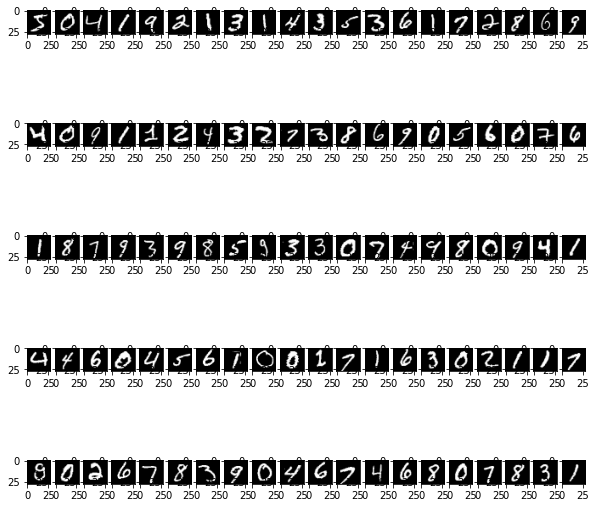

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,20,figsize=(10,10))
for i in range(5):
    for j in range(20):
        # convert feature vector into an image matrix
        img = x_train[i*20+j,:].reshape([28,28]) 
        axs[i,j].imshow(img,cmap='gray')                                                                            
plt.show()

The images are in a gray scale with the size 28x28. In the dataset, we already convert the images into arrays of 784 features and normalise the data, so no normalisation code is needed for this exercise. 

You should adapt the grid search learnt earlier for this task. Complete the following grid search function and modify it to suit the task.

In [25]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

def grid_search(model, grid_params):
    all_inputs = np.append(x_train, x_val, axis=0)
    all_labels = np.append(y_train, y_val)

    val_inds = [-1]*x_train.shape[0] + [0]*x_val.shape[0]
    ps   = PredefinedSplit(test_fold=val_inds)

    print("Start training ...")
    # employ Grid Search with cross validation, but now there is only 1 fold with the val part is for validation
    grid = GridSearchCV(model, param_grid=grid_params,cv=ps, scoring="accuracy",refit = True, verbose = 3,n_jobs=-1) 
    
    # fitting the model for grid search 
    grid.fit(all_inputs, all_labels) 

    print("Finish training")
    
    return grid

Use Support Vector Machines and Random Forest. For each model, use grid search to find a good value for one hyper-parameter (your choice). Report the model that has the best performance on the test set.

In [26]:
# SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear','poly', 'rbf', 'sigmoid']
}  
grid = grid_search(svm, grid_params=param_grid)

Start training ...
Fitting 1 folds for each of 16 candidates, totalling 16 fits
Finish training


In [27]:
print("SVM best model", grid.best_params_)

pred = grid.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
print("Test accuracy %f"%(accuracy))

SVM best model {'C': 10, 'kernel': 'rbf'}
Test accuracy 0.950000


In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],  
    'criterion': ['gini','entropy'],
    'min_samples_leaf': [1, 3, 5]
}  
grid = grid_search(RandomForestClassifier(), grid_params=param_grid)


Start training ...
Fitting 1 folds for each of 18 candidates, totalling 18 fits
Finish training


In [29]:
print("Random Forest best model", grid.best_params_)

pred = grid.predict(x_test) 
accuracy = accuracy_score(y_true=y_test,y_pred=pred)
print("Test accuracy %f"%(accuracy))

Random Forest best model {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}
Test accuracy 0.927000
